In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Goal 1: to approximate the value of π using the "Monte Carlo" method
## steps:
.1 generate many random points within an origin centered square containing the unit circle.

.2 Count how many of said points are within the unit circle.

.3 For large numbers of points, the ratio between the points inside the unit circle and the amount of points should approach π/4. (circle area over the square area)

.4 extract π by multiplying the ratio by the area of the square

Measurements:
- compare error to the np.pi constant for different n


In [24]:
# Function to generate data by seed
def generate_samples(k,square_edge_len =2):
  points = square_edge_len*np.random.rand(k,2) -(square_edge_len/2)
  return points

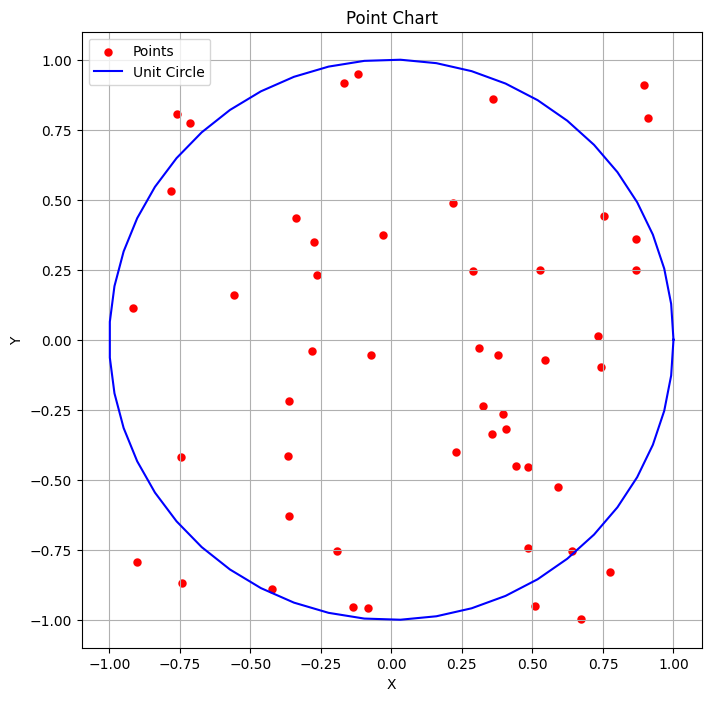

In [25]:
k = 50
square_edge = 2
points =generate_samples(k,square_edge_len= square_edge)

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points',linewidths=0.05)  # Scatter plot of points
plt.title('Point Chart')
plt.xlabel('X')
plt.ylabel('Y')
# plot unit circle
# Generate points along the unit circle
theta = np.linspace(0, 2*np.pi, 50)
x_circle = np.cos(theta)  # Compute x-coordinates
y_circle = np.sin(theta)  # Compute y-coordinates

# Plot the unit circle
plt.plot(x_circle, y_circle, color='blue', linestyle='-', label='Unit Circle')  # Plot the unit circle
# plt.axis('equal')  # Set equal aspect ratio


plt.grid(True)
plt.legend()
plt.show()


##Testing: Single seed precision

In [26]:
def compute_ratio(samples,size):
  # compute how many in root circle
  # Compute the norms of each vector
  norms_array = np.array([np.linalg.norm(sample) for sample in samples])
  # Apply the filter using boolean indexing
  filtered_samples = samples[norms_array <= 1]
  return len(filtered_samples)/size

# -------------------------------------
def estimated_pi(ratio,square_edge_len=2):
  return ratio*(square_edge_len**2)

In [27]:
estimated_pi(compute_ratio(samples= points,size=k))

3.28

#Testing: n over various estimates

In [28]:
def estimate_for_n(n=50,estimates_count = 10):
  estimate = 0
  for i in range(estimates_count):
    points =generate_samples(k=n,square_edge_len=2)
    estimate += estimated_pi(compute_ratio(samples= points,size=n))/estimates_count
  return estimate
# --------------------------------------------
def error_func(x,expected_x):
  return np.abs(expected_x - x)

In [29]:
pi_estimate = estimate_for_n(n =200,estimates_count = 100)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.1585999999999985, 0.017007346410205404)

In [30]:
pi_estimate = estimate_for_n(n =1000,estimates_count = 100)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.1438, 0.002207346410207034)

In [32]:
pi_estimate = estimate_for_n(n =2000,estimates_count = 500)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.1427679999999985, 0.0011753464102053357)

#Goal 2: to approximate the areea of a { Triangle } using the "Monte Carlo" method
## steps:
.1 generate many random points within an origin centered square containing the unit triangle.

.2 Count how many of said points are within, we just need a way to count.

.3 For large numbers of points, the ratio between the points inside the unit and the amount of points should approach {traingle_area/square_area}.

.4 extract the triangle area by multiplying the ratio by the area of the square

Measurements:
- compare error to the actual area of the triangle, computed by hand for different n


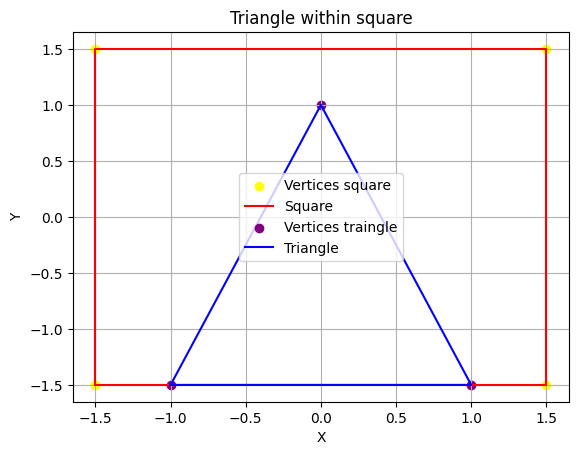

In [41]:

# Define the vertices of the square
x_square = [-1.5, -1.5, 1.5, 1.5, -1.5]
y_square = [-1.5, 1.5, 1.5, -1.5, -1.5]

# Plot the vertices
plt.scatter(x_square, y_square, color='yellow', label='Vertices square')

# Connect the vertices to form the square
plt.plot(x_square, y_square, color='red', linestyle='-', label='Square')


# Define the vertices of the triangle
x = [-1, 0, 1]
y = [-1.5, 1, -1.5]

# Plot the vertices
plt.scatter(x, y, color='purple', label='Vertices traingle')

# Connect the vertices to form the triangle
plt.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], color='blue', linestyle='-', label='Triangle')

# Set plot title and labels
plt.title('Triangle within square')
plt.xlabel('X')
plt.ylabel('Y')


# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [47]:
# A way to determine if a point is inside our shape
def is_inside_traingle(triangle, point):
    x, y = point
    x1, x2, x3 = triangle[0]
    y1, y2, y3 = triangle[1]

    # Calculate barycentric coordinates
    denom = (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    barycentric1 = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / denom
    barycentric2 = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / denom
    barycentric3 = 1 - barycentric1 - barycentric2

    # Check if barycentric coordinates are within the range [0, 1]
    return (0 <= barycentric1 <= 1) and (0 <= barycentric2 <= 1) and (0 <= barycentric3 <= 1)


# Example usage:
triangle = [[-1, 0, 1],
            [-1.5, 1, -1.5]]
point = (0, 1)
print(is_inside_traingle(triangle, point))


True
